# EDA

##### Import libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import datetime
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

##### Load data

In [2]:
posts = pd.read_csv('../data/posts-preprocessed.csv') 

In [3]:
posts.head()

,author,created_utc,subreddit,text,timeframe,words,word_stems,text_length,stems_word_count
0,sub30605,1499390694,bulimia,['chest pains anyone else experience chest pa...,pre-covid,"['[', ""'chest"", 'pains', 'anyone', 'else', 'ex...","['[', ""'chest"", 'pains', 'anyone', 'else', 'ex...",1,182
1,sub27274,1499060654,bulimia,['dying to eat eating to die study on shifting...,pre-covid,"['[', ""'dying"", 'eat', 'eating', 'die', 'study...","['[', ""'dying"", 'eat', 'eating', 'die', 'study...",1,1285
2,sub6055,1499029087,bulimia,['without purging what is the quickest way to...,pre-covid,"['[', ""'without"", 'purging', 'quickest', 'way'...","['[', ""'without"", 'purging', 'quickest', 'way'...",1,98
3,sub40365,1498978259,bulimia,['bulimia and melancholy feelings i havent pu...,pre-covid,"['[', ""'bulimia"", 'melancholy', 'feelings', 'h...","['[', ""'bulimia"", 'melancholy', 'feelings', 'h...",1,386
4,sub49857,1498814187,bulimia,['im relapsing fuck im so upset at myself rig...,pre-covid,"['[', ""'im"", 'relapsing', 'fuck', 'im', 'upset...","['[', ""'im"", 'relapsing', 'fuck', 'im', 'upset...",1,689


In [4]:
posts['subreddit'].value_counts()

bulimia            9770
AnorexiaNervosa    9715
schizophrenia      9534
bipolar            9480
Anxiety            9455
mentalhealth       9445
BPD                9341
depression         9318
autism             9264
Name: subreddit, dtype: int64

### Submission Lengths

In [5]:
# Create a new column with submission length
posts['text_length'] = posts['text'].map(len)

In [6]:
# Create a new column with number of words per submission
posts['stems_word_count'] = posts['word_stems'].map(len)

In [7]:
# Show the shortest submissions
posts.sort_values(by='text_length', ascending=True)[['text']].head()

,text
10790,['ゞ']
59425,['_']
59380,['d']
48950,['me']
56861,['me']


In [8]:
# Show the longest submissions
posts.sort_values(by='word_stems', ascending=False)[['text']].head()

,text
26143,['zyprexa zydis anybody take this and feel li...
70648,['zyprexa not working i always use zyprexa to...
5900,['zyprexa and weight gain im honestly sitting...
70273,['zyprexa weight gain does anyone have tips o...
27572,['zyprexa weight gain anyone have any clever ...


In [9]:
# Show the shortest submissions
posts.sort_values(by='word_stems', ascending=True)[['text']].head()

,text
52029,['i had to']
27263,[' d']
23404,['i have 0 control over my emotions i was dia...
29440,['1 in 5 college students have anxiety or depr...
68520,['1 beware of the mighty shrooms 2 floating aw...


In [10]:
# Show the longest submissions
posts.sort_values(by='stems_word_count', ascending=False)[['text']].head()

,text
20744,['reciprocal suffering if you have the time p...
18632,['i think i may have schizophrenia please help...
48150,['a rather fast recovery ampx200b\n\ni will t...
82243,['ive been depressed for as long as i can reme...
84800,['a really long sad story where do i begin it...


# Distribution of submission lengths

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


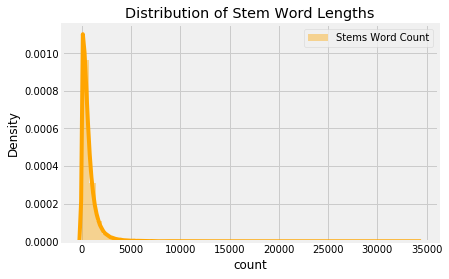

In [11]:
sns.distplot(posts['stems_word_count'] , color = 'orange', label="Stems Word Count",bins=50)
plt.xlabel("count")
plt.title("Distribution of Stem Word Lengths")
plt.legend();

In [ ]:
# To do: look at pre and post covid and by disorder

## Unique users

In [12]:
posts.head()

,author,created_utc,subreddit,text,timeframe,words,word_stems,text_length,stems_word_count
0,sub30605,1499390694,bulimia,['chest pains anyone else experience chest pa...,pre-covid,"['[', ""'chest"", 'pains', 'anyone', 'else', 'ex...","['[', ""'chest"", 'pains', 'anyone', 'else', 'ex...",172,182
1,sub27274,1499060654,bulimia,['dying to eat eating to die study on shifting...,pre-covid,"['[', ""'dying"", 'eat', 'eating', 'die', 'study...","['[', ""'dying"", 'eat', 'eating', 'die', 'study...",1353,1285
2,sub6055,1499029087,bulimia,['without purging what is the quickest way to...,pre-covid,"['[', ""'without"", 'purging', 'quickest', 'way'...","['[', ""'without"", 'purging', 'quickest', 'way'...",77,98
3,sub40365,1498978259,bulimia,['bulimia and melancholy feelings i havent pu...,pre-covid,"['[', ""'bulimia"", 'melancholy', 'feelings', 'h...","['[', ""'bulimia"", 'melancholy', 'feelings', 'h...",398,386
4,sub49857,1498814187,bulimia,['im relapsing fuck im so upset at myself rig...,pre-covid,"['[', ""'im"", 'relapsing', 'fuck', 'im', 'upset...","['[', ""'im"", 'relapsing', 'fuck', 'im', 'upset...",718,689


In [13]:
# Find number of unique users for combined dataset.
posts['author'].describe()

count        85322
unique       58522
top       sub39034
freq            89
Name: author, dtype: object

In [14]:
# Look at number of submissions per user.
posts['author'].value_counts().head(10)

sub39034    89
sub229      82
sub57663    81
sub53852    73
sub8815     72
sub5687     60
sub28226    58
sub16227    52
sub11811    52
sub16344    50
Name: author, dtype: int64

## Plot most frequently used words

In [15]:
# create the transform
vectorizer = TfidfVectorizer()

In [16]:
text = posts['word_stems']

In [17]:
vectors = vectorizer.fit_transform(text)

In [18]:
feature_names = vectorizer.get_feature_names()


In [19]:
dense = vectors.todense()


In [ ]:
denselist = dense.tolist()


In [ ]:
df = pd.DataFrame(denselist, columns=feature_names)


In [ ]:
df.sum(axis=0).sort_values(ascending=False).head(15)


In [ ]:
df.sum().sort_values(ascending=False).head(20).plot(kind='barh');
